# Buiding a custom image classifier model for CIFAR10 dataset (CNN)

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import random
import cv2

In [81]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

image_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(x_train.shape)

(50000, 32, 32, 3)


array([[ 65,  68,  50],
       [ 70,  81,  64],
       [ 48,  64,  46],
       [ 30,  46,  30],
       [ 23,  33,  22],
       [ 40,  57,  36],
       [ 44,  75,  55],
       [ 45,  80,  57],
       [ 45,  83,  59],
       [ 40,  70,  54],
       [ 10,  20,  12],
       [ 15,  34,  18],
       [ 44,  71,  43],
       [ 53,  75,  44],
       [ 51,  70,  49],
       [ 48,  66,  50],
       [ 65,  87,  58],
       [ 90, 120,  77],
       [ 93, 124,  81],
       [ 91, 121,  77],
       [ 95, 126,  83],
       [ 81, 108,  78],
       [ 60,  84,  56],
       [ 55,  82,  57],
       [112, 136,  97],
       [111, 129,  93],
       [ 41,  59,  31],
       [ 68,  91,  58],
       [ 77,  96,  65],
       [ 51,  67,  41],
       [ 54,  76,  53],
       [ 67,  87,  66]], dtype=uint8)

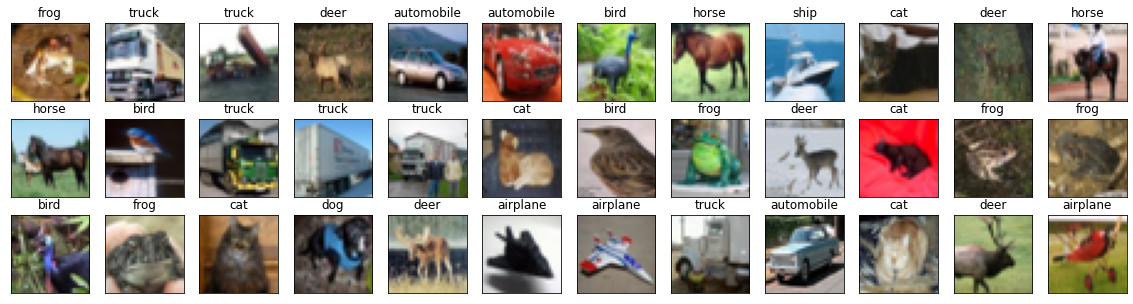

In [111]:
%matplotlib inline
img = plt.figure(figsize=(20,5))
for i in range(36):
    axis = img.add_subplot(3,12, i+1, xticks=[], yticks=[])
    axis.imshow(np.squeeze(x_train[i]))
    axis.set_title(image_classes[y_train[i][0]])
    plt.savefig('random_img_in_dataset.jpg')

In [17]:
# creating one hot encode of image labels
y_train_hot_encode = to_categorical(y_train)
y_test_hot_encode = to_categorical(y_test)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# separate validation data

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train_hot_encode[5000:], y_train_hot_encode[:5000]

print(y_train.shape)

(45000, 10)


In [18]:
# store the shape of a single image 
input_shape = (32, 32, 3)

# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

# saving model architechture to file for use some other time.
json_config = model.to_json()
model_config_file = open("cifar10_cnn_config.json", "w")
model_config_file.write(json_config)
model_config_file.close()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [19]:
batch_size = 10
epochs = 5

print(x_test.shape)
print(y_test.shape)

checkpointer = ModelCheckpoint(filepath='model.125epochs.pb', verbose=1, save_best_only=True)
opt = SGD(lr=0.001, momentum=0.9)

model.compile(
              # Loss function to minimize,
              loss = 'categorical_crossentropy',
              optimizer = opt,  # Optimizer
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_valid, y_valid))

(10000, 32, 32, 3)
(10000, 1)
Epoch 1/5
4500/4500 [==============================] - 302s 67ms/step - loss: 1.4985 - accuracy: 0.4588 - val_loss: 1.2249 - val_accuracy: 0.5564
Epoch 2/5
4500/4500 [==============================] - 285s 63ms/step - loss: 1.0944 - accuracy: 0.6104 - val_loss: 0.9880 - val_accuracy: 0.6510
Epoch 3/5
4500/4500 [==============================] - 304s 68ms/step - loss: 0.9007 - accuracy: 0.6830 - val_loss: 0.8999 - val_accuracy: 0.6862
Epoch 4/5
4500/4500 [==============================] - 331s 74ms/step - loss: 0.7602 - accuracy: 0.7337 - val_loss: 0.8689 - val_accuracy: 0.6928
Epoch 5/5
4500/4500 [==============================] - 290s 64ms/step - loss: 0.6407 - accuracy: 0.7760 - val_loss: 0.8307 - val_accuracy: 0.7194
Evaluate on test data


NameError: name 'results' is not defined

In [66]:
print("Evaluate on test data")
evaluate_score = model.evaluate(x_test, y_test_hot_encode, batch_size=128, verbose=0, callbacks=checkpointer)
print("test loss, test acc:", evaluate_score)


print('Test loss:', evaluate_score[0])
print('Test accuracy:', evaluate_score[1])
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
#print("predictions: " + predictions)
print(type(predictions))
print(predictions[0])
print(predictions[0].shape)

Evaluate on test data
test loss, test acc: [165.92105102539062, 0.5458999872207642]
Test loss: 165.92105102539062
Test accuracy: 0.5458999872207642
Generate predictions for 3 samples
<class 'numpy.ndarray'>
[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6836724e-38 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
(10,)


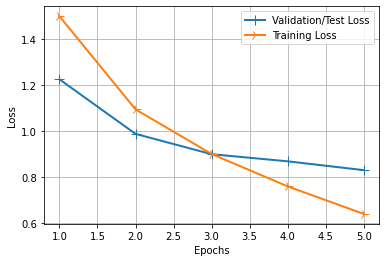

In [59]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('loss_chart.jpg')
plt.show()

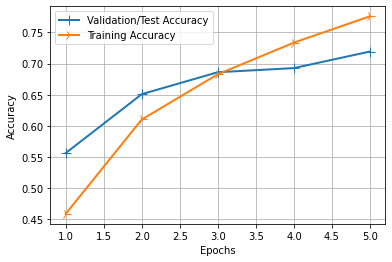

In [58]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('accuracy_chart.jpg')
plt.show()

In [33]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("cifar10_2_block_vgg_model")

INFO:tensorflow:Assets written to: cifar10_2_block_vgg_model\cifar10_2_block_vgg_model\assets


In [36]:
classifier = tf.keras.models.load_model('cifar10_2_block_vgg_model')

print("model loaded")

model loaded


In [114]:
model_score = 0
counted = False

def draw_test(name, pred, true_class, input_im, count):
    cv2.putText(input_im, "Predict: " + pred, (20, 40) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 2)
    cv2.putText(input_im, "True: " + true_class, (20, 100) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,255), 2)
    cv2.imshow(name, input_im)
    if count == True:
        cv2.imwrite(name+str(model_score)+ ".jpg", input_im)
        

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, (300,300), interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,32,32,3) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    res = image_classes[int(res)]
    true_c = image_classes[y_test[rand][0]]

    if res == true_c:
        model_score = model_score + 1
        print(model_score)
        counted = True

    draw_test("Prediction", res, true_c, imageL, counted) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

1
2
3
4
5
6
7
